In [92]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Question 13
### 13.a

In [93]:
weekly = pd.read_csv('../../data/weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [94]:
weekly.shape

(1089, 9)

In [95]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [96]:
weekly.select_dtypes(include=[np.number]).corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


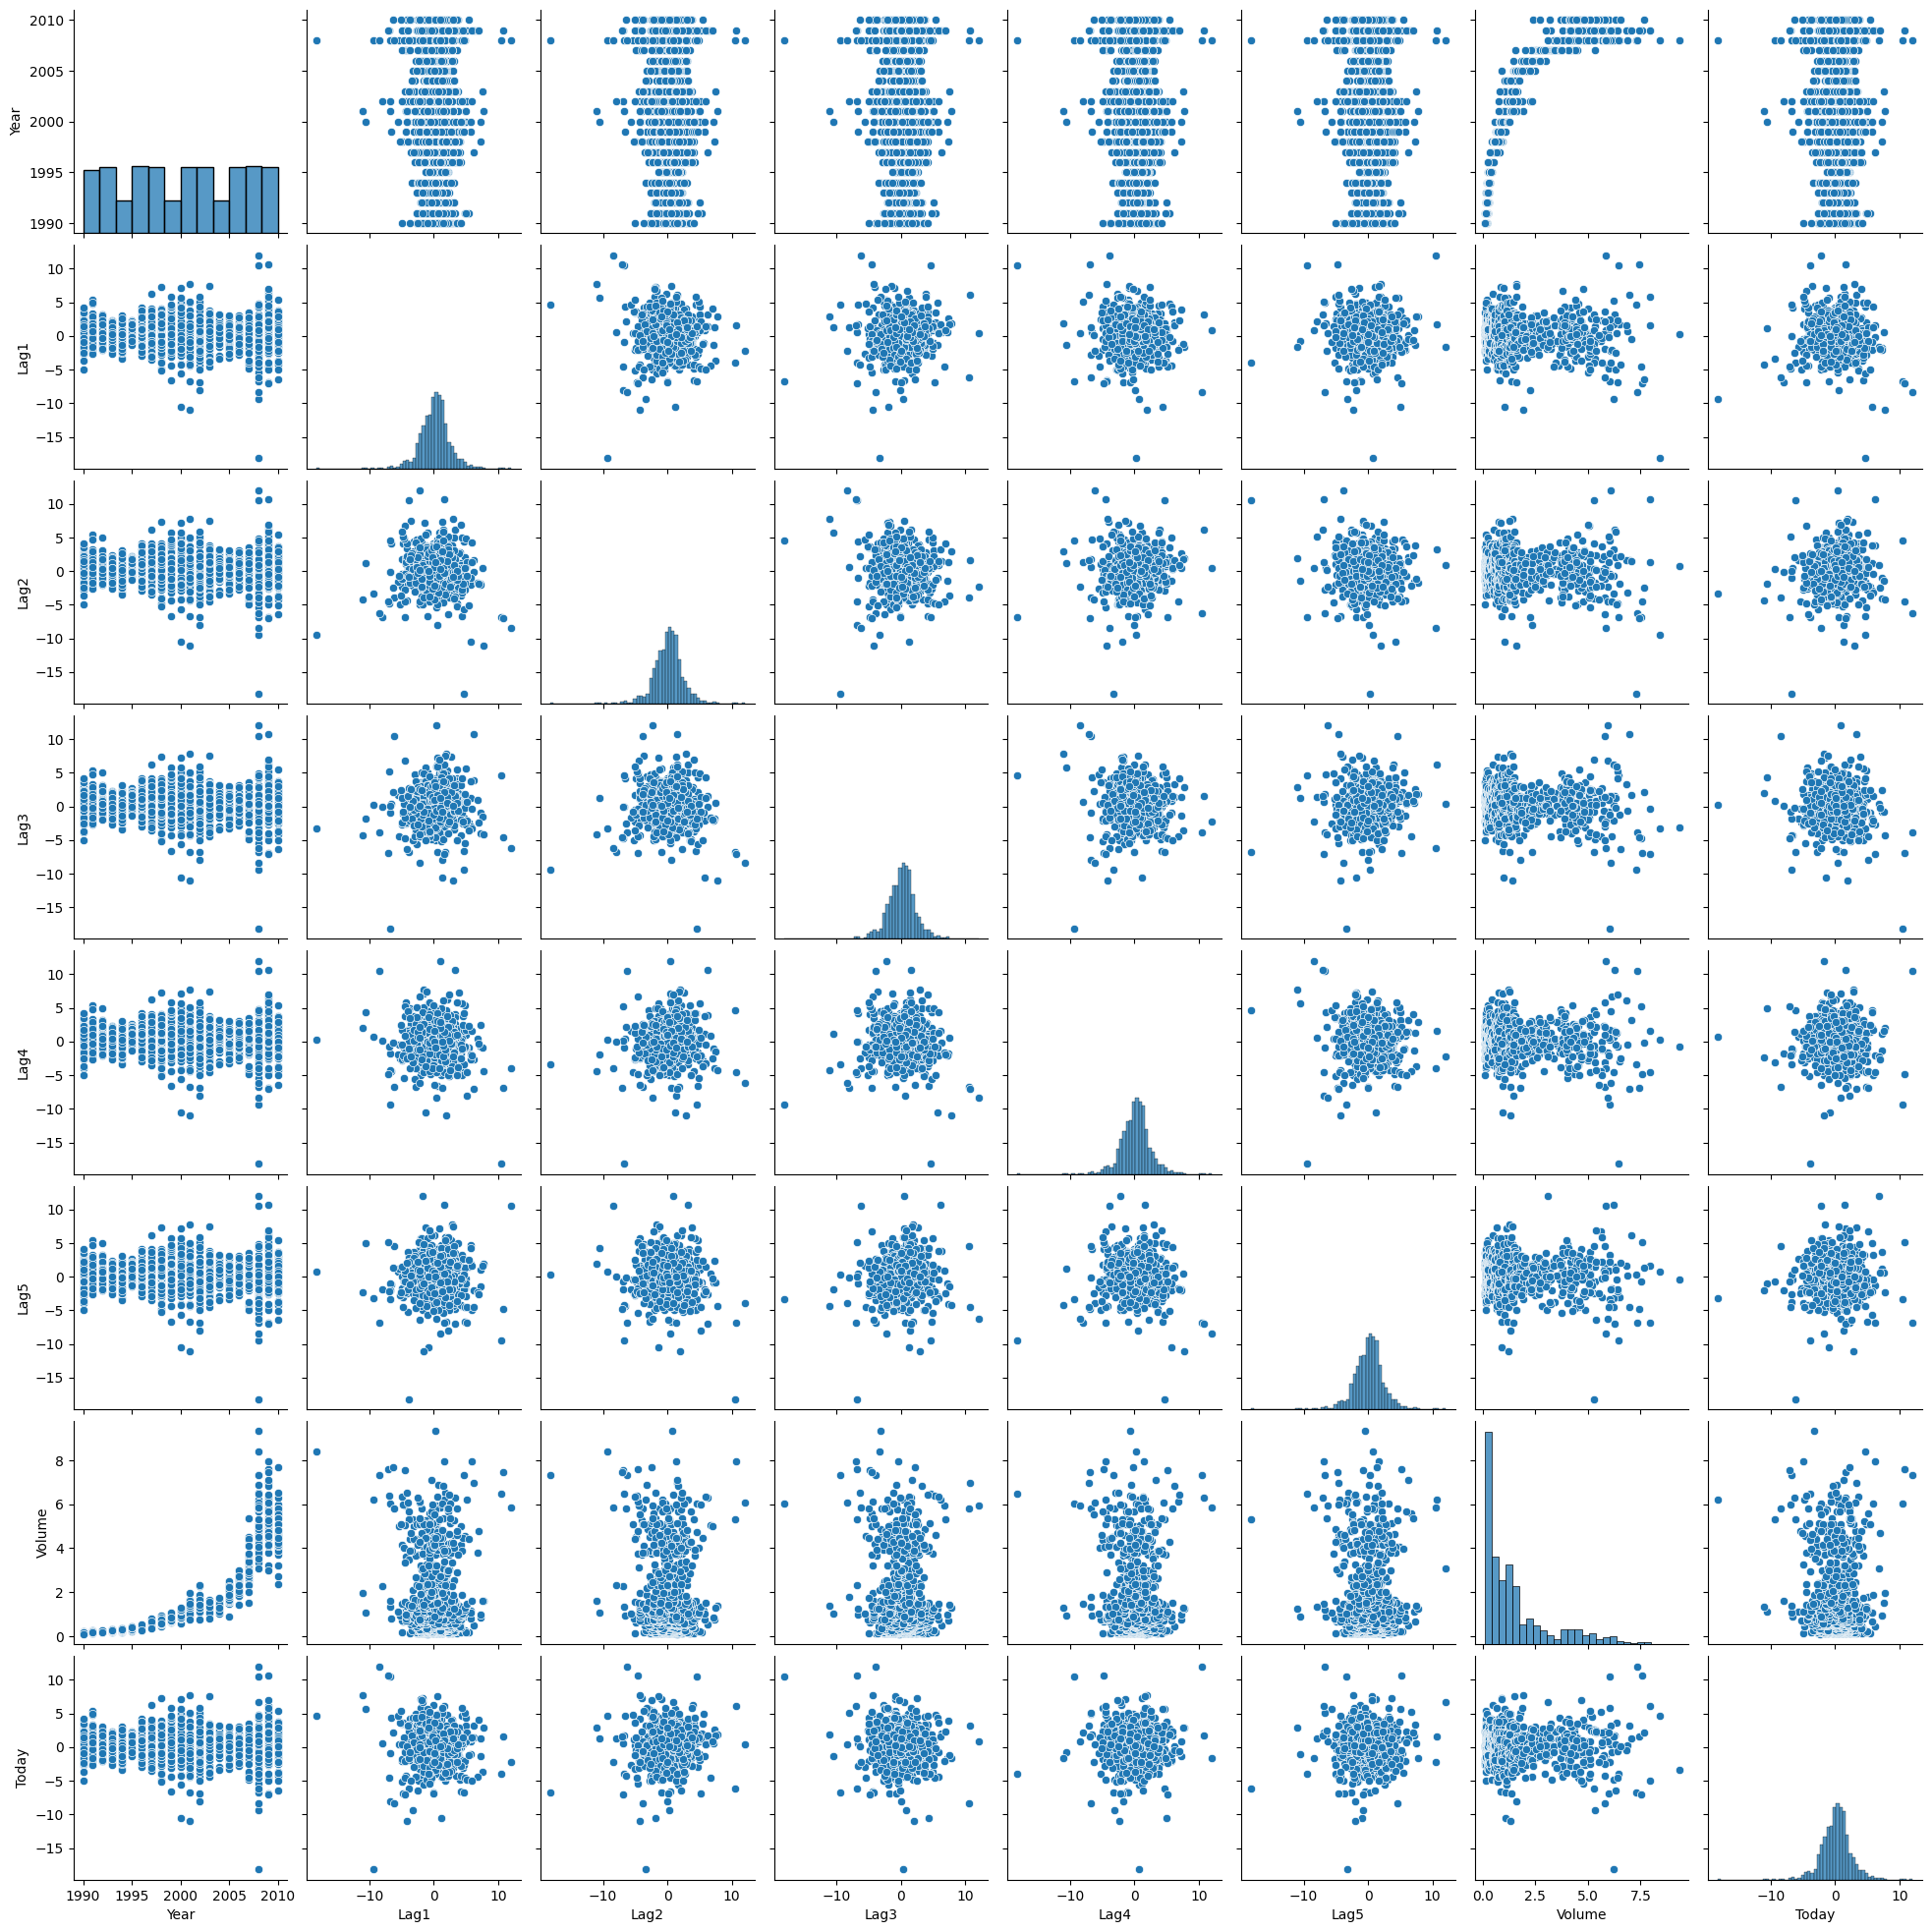

In [97]:
sns.pairplot(weekly)

There are no obvious strong relationships between the `Lag` variables.
There is a strong correlation between `Volume` and `Year` variables, if we plot `Volume` data over `Year`:

Text(0, 0.5, 'Volume')

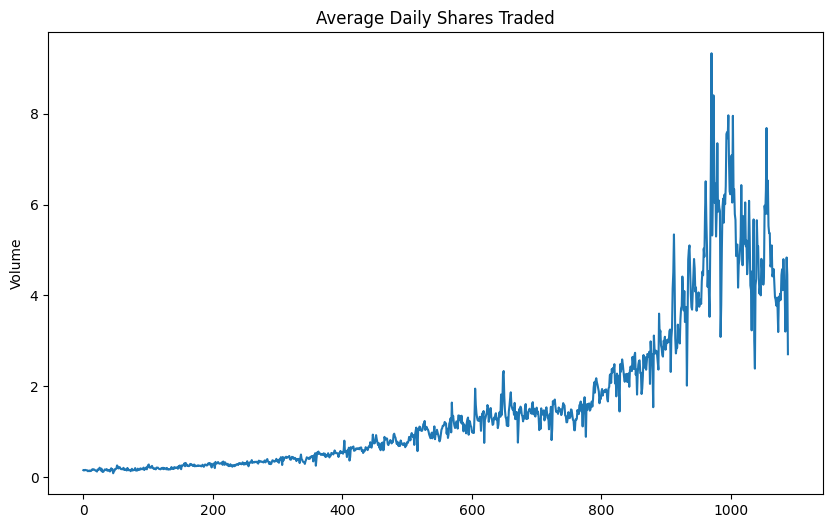

In [98]:
plt.figure(figsize=(10,6))
plt.plot(weekly.Volume)
plt.title('Average Daily Shares Traded')
plt.ylabel('Volume')

The data indicates a rise in volume that began in the 1990s and continued until 2009, reaching its peak around that time. However, after 2009, the volume started to decline.

In [99]:
weekly.Direction.describe()

count     1089
unique       2
top         Up
freq       605
Name: Direction, dtype: object

- 'Up': 605
- 'Down': 484

55% percent of the `Direction` data is `Up`, and the other 45% percent is `Down`

### 13.b

In [100]:
X = weekly.loc[:, 'Lag1':'Volume']
y = pd.get_dummies(weekly['Direction'])['Up']

sm_logit = sm.Logit(y, sm.add_constant(X)).fit()
sm_logit.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 09 Jul 2025   Pseudo R-squ.:                0.006580
Time:                        13:42:21   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

`Intercept`, and `Lag2` variables are looking statistically significant according to the associated p-values. Since the other `Lag` predictors are not statistically significant, we can still be skeptical about `Lag2` too.

### 13.c

In [101]:
X_sk = weekly.loc[:, 'Lag1':'Volume']
y_sk = weekly['Direction']

sk_logit = LogisticRegression(fit_intercept=True)
sk_logit.fit(X_sk, y_sk)
sk_logit.intercept_, sk_logit.coef_

(array([0.26685095]),
 array([[-0.04123352,  0.05839182, -0.01604123, -0.02777908, -0.01445306,
         -0.02273943]]))

In [102]:
acc_score = accuracy_score(y_sk, sk_logit.predict(X_sk))
print(f'Accuracy: {acc_score}')
print(f'Training Error: {1-acc_score}')

Accuracy: 0.5610651974288338
Training Error: 0.43893480257116624


By predicting `Up` every time, we would achieve a baseline accuracy of 55%. However, our logistic regression model only improves the accuracy slightly to 56%. This indicates that the model does not perform significantly better than the baseline, and it may not be suitable for this dataset. The model essentially relying o nthe `intercept` term to bias the output towards predicting `Up`.

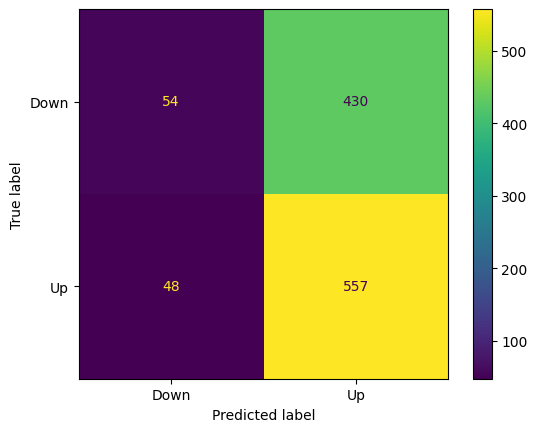

In [103]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_sk, sk_logit.predict(X_sk)), display_labels=['Down', 'Up'])
disp.plot()

### 13.d

In [104]:
training_set = weekly[weekly.Year <= 2008]
test_set = weekly[weekly.Year >= 2009]

X_train = training_set.Lag2.values.reshape(-1, 1)
y_train = training_set.Direction

X_test = test_set.Lag2.values.reshape(-1, 1)
y_test = test_set.Direction

In [105]:
sk_logit_2 = LogisticRegression(fit_intercept=True)
sk_logit_2.fit(X_train, y_train)

sk_logit_2.intercept_, sk_logit_2.coef_

(array([0.20323048]), array([[0.0580307]]))

In [106]:
acc_score = accuracy_score(y_test, sk_logit_2.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.625
Test Error: 0.375


The accuracy rate of the new model using only `Lag2` as a predictor is 62.5%, which is slightly higher than the baseline accuracy of 55%.

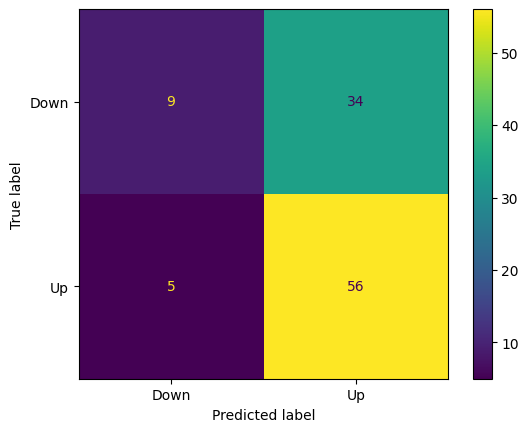

In [107]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, sk_logit_2.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

### 13.e (Linear Discriminant Analysis)

In [108]:
weekly_lda = LinearDiscriminantAnalysis()
weekly_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [109]:
acc_score = accuracy_score(y_test, weekly_lda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.625
Test Error: 0.375


The accuracy rate of the Linear Discriminant Analysis model using only `Lag2` as a predictor is 62.5%.

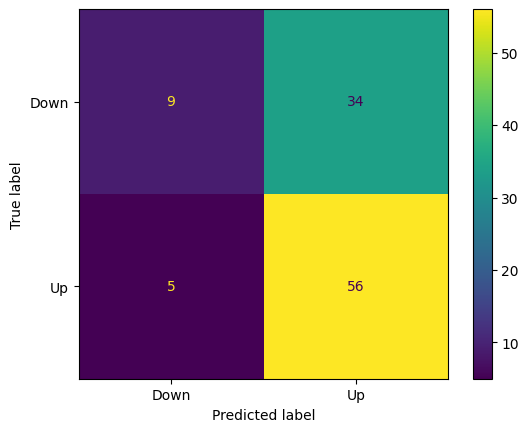

In [110]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, weekly_lda.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

The same problem still exists in this model as well, as the model is still biased towards predicting an "Up" outcome.

### 13.f (Quadratic Discriminant Analysis)

In [111]:
weekly_qda = QuadraticDiscriminantAnalysis()
weekly_qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [112]:
acc_score = accuracy_score(y_test, weekly_qda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5865384615384616
Test Error: 0.41346153846153844


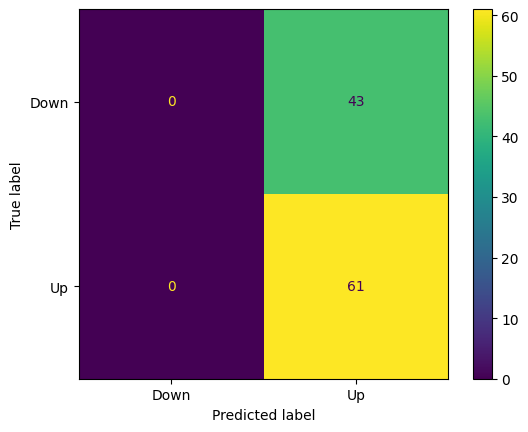

In [113]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, weekly_qda.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

The QDA model is performing worse than LDA on this data. Its accuracy rate is 59%, which is almost the same as the baseline performance rate. This suggests that the QDA model is predicting `Up` for every single test example, indicating a biased output.

### 13.g KNN (with K=1)

In [114]:
weekly_knn = KNeighborsClassifier(n_neighbors=1)
weekly_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [115]:
acc_score = accuracy_score(y_test, weekly_knn.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5096153846153846
Test Error: 0.4903846153846154


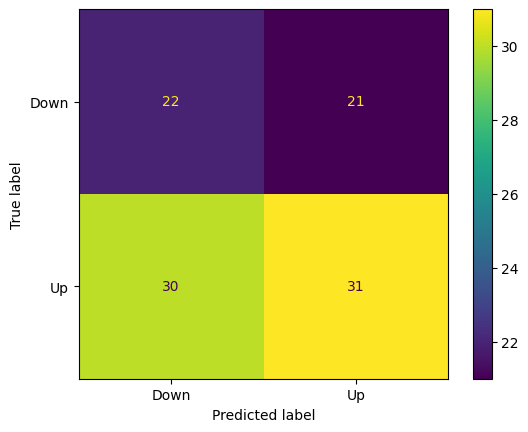

In [116]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, weekly_knn.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

The KNN model is performing worse than the baseline model, which predicts `Up` for every test example. The accuracy rate of the KNN model is only 50%, which is not much better than random guessing.

### 13.h Naive Bayes

In [117]:
weekly_naive_bayes = GaussianNB()
weekly_naive_bayes.fit(X_train, y_train)

GaussianNB()

In [118]:
acc_score = accuracy_score(y_test, weekly_naive_bayes.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Test Error: {1-acc_score}')

Accuracy: 0.5865384615384616
Test Error: 0.41346153846153844


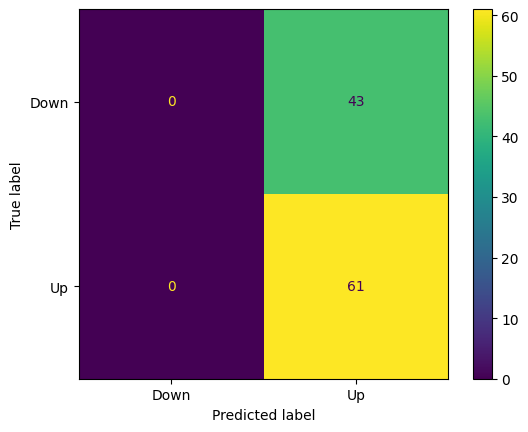

In [119]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, weekly_naive_bayes.predict(X_test)), display_labels=['Down', 'Up'])
disp.plot()

Naive Bayes Method is not much better than the baseline method, we get an accuracy of 59%.

### 13.i

If we use overall accuracy of the models as our criteria to choose the model with the best performance rates, we get `Logistic Regression`, and `LDA` giving the best accuracy.

## Question 14

In [120]:
auto = pd.read_csv('../../data/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 14.a

In [121]:
median = auto.mpg.median()
auto.loc[(auto['mpg'] >= median), 'mpg01'] = 1
auto.loc[(auto['mpg'] < median), 'mpg01'] = 0

### 14.b

In [122]:
auto.select_dtypes(include=[np.number]).corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698,0.834672
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,-0.760944
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,-0.754522
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,-0.757516
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,0.346069
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,0.430619
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,0.509982
mpg01,0.834672,-0.760944,-0.754522,-0.757516,0.346069,0.430619,0.509982,1.000000


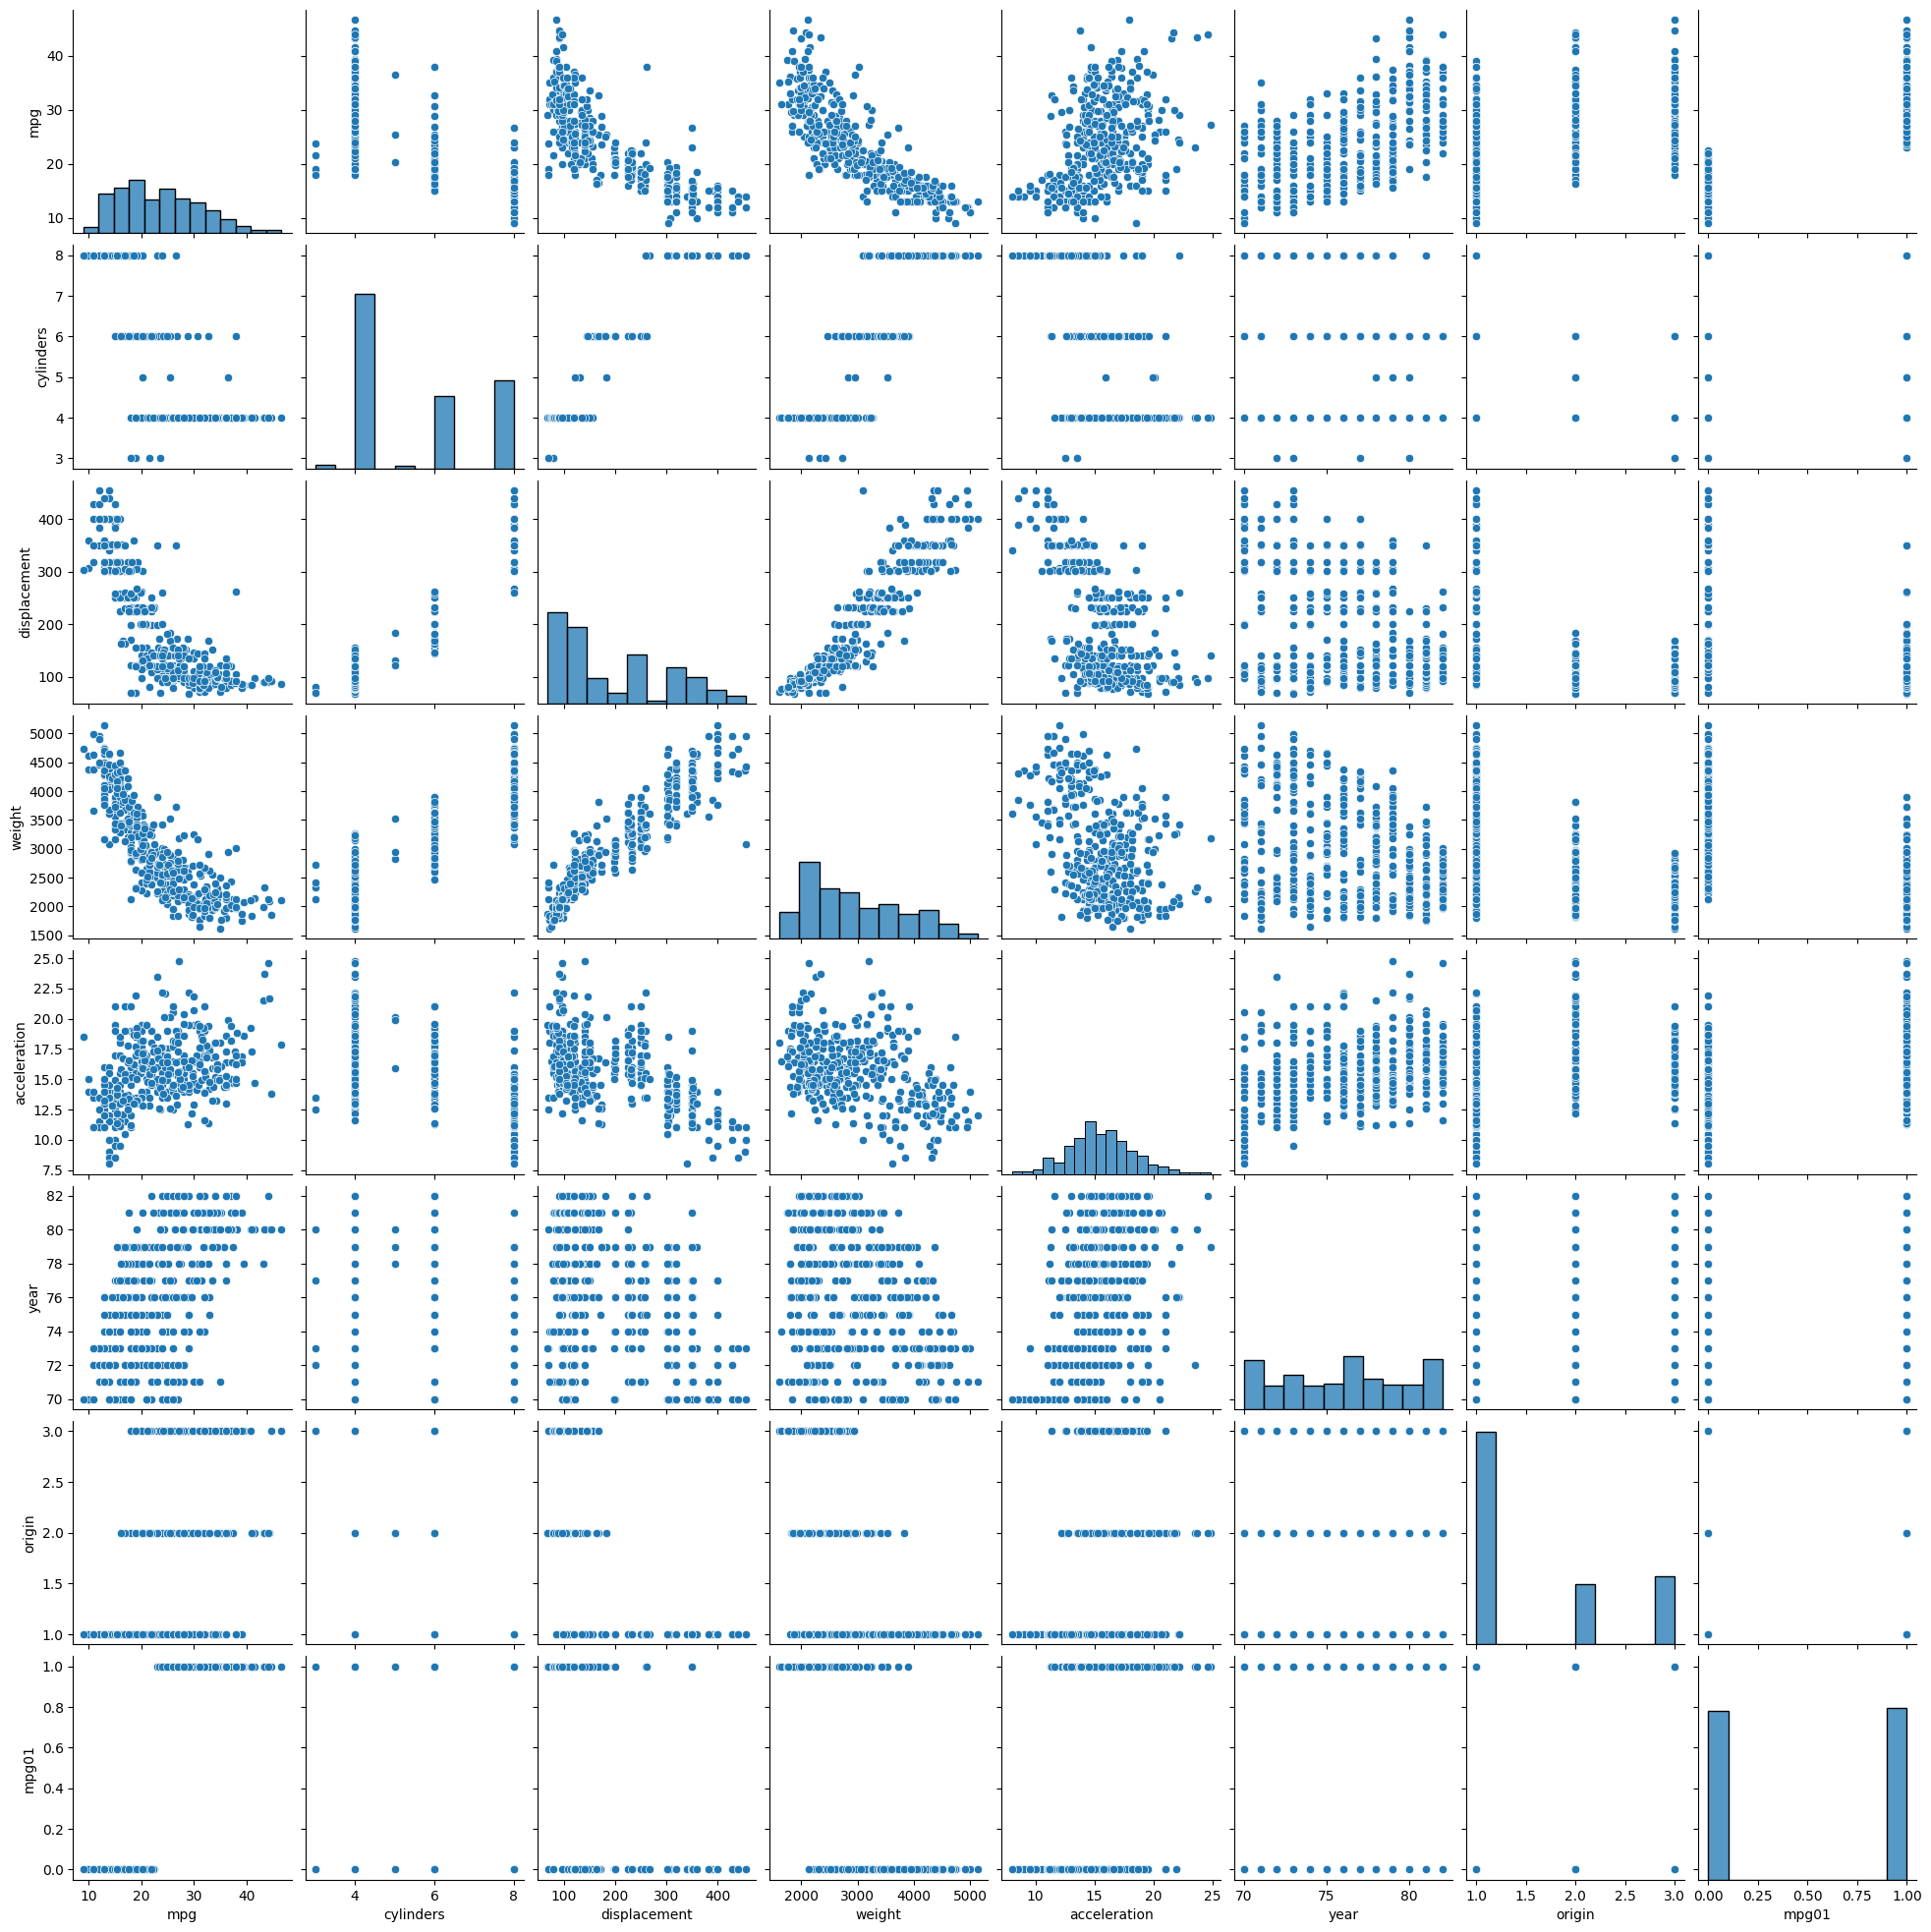

In [123]:
sns.pairplot(auto)
plt.show()

Based on the correlation matrix and pair plot, it appears that `cylinders`, `displacement`,and	`weight` are the three strongest predictors of of `mpg01`.

### 14.c

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(auto.loc[:, ['cylinders', 'displacement', 'weight']], auto['mpg01'], train_size=0.7, random_state=1)

### 14.d Linear Discriminant Analysis

In [125]:
auto_lda = LinearDiscriminantAnalysis()
auto_lda.fit(X_train, y_train)

acc_score = accuracy_score(y_test, auto_lda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'LDA - Test Error: {1-acc_score}')

Accuracy: 0.8916666666666667
LDA - Test Error: 0.10833333333333328


### 14.e Quadratic Discriminant Analysis

In [126]:
auto_qda = QuadraticDiscriminantAnalysis()
auto_qda.fit(X_train, y_train)

acc_score = accuracy_score(y_test, auto_qda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'QDA - Test Error: {1-acc_score}')

Accuracy: 0.8833333333333333
QDA - Test Error: 0.1166666666666667


### 14.f Logistic Regression

In [127]:
auto_logit = LogisticRegression(fit_intercept=True)
auto_logit.fit(X_train, y_train)

acc_score = accuracy_score(y_test, auto_logit.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Logistic Regression - Test Error: {1-acc_score}')

Accuracy: 0.8833333333333333
Logistic Regression - Test Error: 0.1166666666666667


### 14.g Naive Bayes

In [128]:
auto_naiveBayes = GaussianNB()
auto_naiveBayes.fit(X_train, y_train)

acc_score = accuracy_score(y_test, auto_naiveBayes.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Naive Bayes - Test Error: {1-acc_score}')

Accuracy: 0.8916666666666667
Naive Bayes - Test Error: 0.10833333333333328


### 14.h KNN

In [129]:
k_values = [1, 10, 25, 50, 75,100]

for k in k_values:
    auto_knn = KNeighborsClassifier(n_neighbors=k)
    auto_knn.fit(X_train, y_train)
    
    acc_score = accuracy_score(y_test, auto_knn.predict(X_test))
    print(f'K-value: {k}')
    print(f'Accuracy: {acc_score}')
    print(f'KNN - Test Error: {1-acc_score}')
    print('-'*20)

K-value: 1
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------
K-value: 10
Accuracy: 0.8833333333333333
KNN - Test Error: 0.1166666666666667
--------------------
K-value: 25
Accuracy: 0.8833333333333333
KNN - Test Error: 0.1166666666666667
--------------------
K-value: 50
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------
K-value: 75
Accuracy: 0.8666666666666667
KNN - Test Error: 0.1333333333333333
--------------------
K-value: 100
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------


The KNN model with a K value between 10 and 25 appears to be the most effective on this dataset.

## Question 15

In [130]:
def Power():
    print(2**3)
Power()

8


In [131]:
def Power2(x, a):
    print(x**a)
Power2(3, 8)

6561


In [132]:
def Power3(x, a):
    if type(x) == list or type(x) == range:
        return np.power(integers, a)
    return x**a

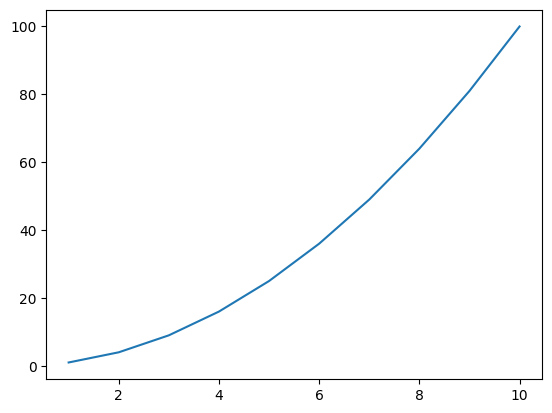

In [133]:
integers = range(1, 11, 1)
type(integers)
plt.plot(integers, Power3(integers, 2))

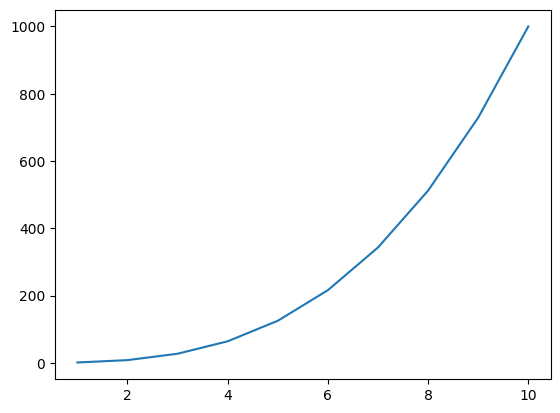

In [134]:
def PlotPower(rangelist, power):
    powerlist = Power3(rangelist, power)
    plt.plot(rangelist, powerlist)
    
PlotPower(range(1, 11, 1), 3)

## Question 16

In [135]:
boston = pd.read_csv('../../data/boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [136]:
median = boston.crim.median()
boston.loc[(boston.crim >= median), 'crim01'] = 1
boston.loc[(boston.crim < median), 'crim01'] = 0

In [137]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741


High correlated variables are `indus`, `nox`, `age`, `dis`, `rad`,and `tax`.

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.loc[:, ['indus', 'nox', 'age', 'dis', 'rad', 'tax']], 
                                                    boston['crim01'], train_size=0.7, random_state=1)

In [139]:
boston_logit = LogisticRegression(fit_intercept=True, max_iter=1000)
boston_logit.fit(X_train, y_train)

acc_score = accuracy_score(y_test, boston_logit.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Logistic Regression - Test Error: {1 - acc_score}')

Accuracy: 0.8223684210526315
Logistic Regression - Test Error: 0.17763157894736847


In [140]:
boston_lda = LinearDiscriminantAnalysis()
boston_lda.fit(X_train, y_train)

acc_score = accuracy_score(y_test, boston_lda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'LDA - Test Error: {1-acc_score}')

Accuracy: 0.8223684210526315
LDA - Test Error: 0.17763157894736847


In [141]:
boston_qda = QuadraticDiscriminantAnalysis()
boston_qda.fit(X_train, y_train)

acc_score = accuracy_score(y_test, boston_qda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'QDA - Test Error: {1-acc_score}')

Accuracy: 0.875
QDA - Test Error: 0.125


In [142]:
boston_naiveBayes = GaussianNB()
boston_naiveBayes.fit(X_train, y_train)

acc_score = accuracy_score(y_test, boston_naiveBayes.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Naive Bayes - Test Error: {1-acc_score}')

Accuracy: 0.8092105263157895
Naive Bayes - Test Error: 0.1907894736842105


In [143]:
k_values = range(1,20,2)

for k in k_values:
    boston_knn = KNeighborsClassifier(n_neighbors=k)
    boston_knn.fit(X_train, y_train)
    
    acc_score = accuracy_score(y_test, boston_knn.predict(X_test))
    print(f'K-value: {k}')
    print(f'Accuracy: {acc_score}')
    print(f'KNN - Test Error: {1-acc_score}')
    print('-'*20)

K-value: 1
Accuracy: 0.9078947368421053
KNN - Test Error: 0.09210526315789469
--------------------
K-value: 3
Accuracy: 0.9144736842105263
KNN - Test Error: 0.08552631578947367
--------------------
K-value: 5
Accuracy: 0.9078947368421053
KNN - Test Error: 0.09210526315789469
--------------------
K-value: 7
Accuracy: 0.8881578947368421
KNN - Test Error: 0.11184210526315785
--------------------
K-value: 9
Accuracy: 0.875
KNN - Test Error: 0.125
--------------------
K-value: 11
Accuracy: 0.881578947368421
KNN - Test Error: 0.11842105263157898
--------------------
K-value: 13
Accuracy: 0.8618421052631579
KNN - Test Error: 0.13815789473684215
--------------------
K-value: 15
Accuracy: 0.8421052631578947
KNN - Test Error: 0.1578947368421053
--------------------
K-value: 17
Accuracy: 0.8289473684210527
KNN - Test Error: 0.17105263157894735
--------------------
K-value: 19
Accuracy: 0.8223684210526315
KNN - Test Error: 0.17763157894736847
--------------------


Based on the test error results, it can be concluded that the KNN model with K=3 and using the most correlated variables (`indus`, `nox`, `age`, `dis`, `rad`,and `tax`) with the `crim01` response variable is the most effective model.